<a href="https://colab.research.google.com/github/gaurav4288/Machine_learning/blob/main/22_Numerical_data_imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Univariate imputation**


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [71]:
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df=pd.read_csv(url,usecols=["Age","Fare","Survived","SibSp","Parch"])
df.head()
family=df['Parch']+df['SibSp']
df['Family']=family
df.drop(['Parch','SibSp'],axis=1,inplace=True)
move = df.pop('Survived')
df.insert(3,'Survived', move)

df.to_csv("titanic.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


# Mean/Median imputation
# (missing values should be less than 5% and MCAR)
# use median if skewed


In [73]:
df.isnull().mean()

Age         0.198653
Fare        0.000000
Family      0.000000
Survived    0.000000
dtype: float64

In [74]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [77]:
X_train.isnull().mean()

Age       0.207865
Fare      0.000000
Family    0.000000
dtype: float64

In [78]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

print(mean_age,median_age,mean_fare,median_fare)

29.78590425531915 28.75 32.28905603932584 14.4583


In [79]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)

In [80]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
673,31.0,13.0000,0,31.0,31.0,13.0000,13.0000
292,36.0,12.8750,0,36.0,36.0,12.8750,12.8750
325,36.0,135.6333,0,36.0,36.0,135.6333,135.6333
92,46.0,61.1750,1,46.0,46.0,61.1750,61.1750
784,25.0,7.0500,0,25.0,25.0,7.0500,7.0500


In [81]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2368.2468324201327
Fare Variance after median imputation:  2368.2468324201327
Fare Variance after mean imputation:  2368.2468324201327


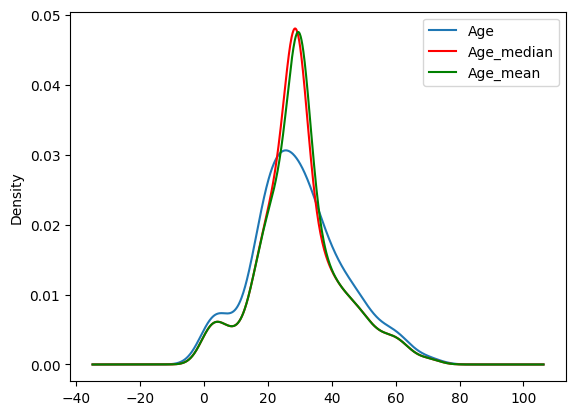

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_median'].plot(kind='kde', ax=ax, color='red')
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

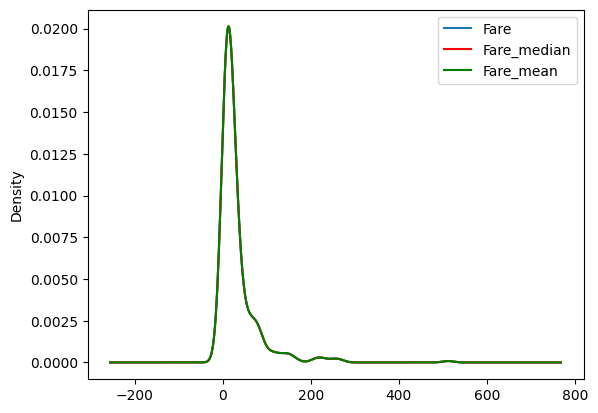

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [84]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,71.512440,-6.498901,204.349513,204.349513,71.512440,71.512440
Fare,71.512440,2368.246832,16.847264,58.986531,56.626587,2368.246832,2368.246832
Family,-6.498901,16.847264,2.735252,-5.112563,-5.146106,16.847264,16.847264
Age_median,204.349513,58.986531,-5.112563,161.989566,161.812625,58.986531,58.986531
Age_mean,204.349513,56.626587,-5.146106,161.812625,161.812625,56.626587,56.626587
Fare_median,71.512440,2368.246832,16.847264,58.986531,56.626587,2368.246832,2368.246832
Fare_mean,71.512440,2368.246832,16.847264,58.986531,56.626587,2368.246832,2368.246832


In [85]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.095814,-0.299113,1.000000,1.000000,0.095814,0.095814
Fare,0.095814,1.000000,0.209323,0.095235,0.091475,1.000000,1.000000
Family,-0.299113,0.209323,1.000000,-0.242883,-0.244610,0.209323,0.209323
Age_median,1.000000,0.095235,-0.242883,1.000000,0.999454,0.095235,0.095235
Age_mean,1.000000,0.091475,-0.244610,0.999454,1.000000,0.091475,0.091475
Fare_median,0.095814,1.000000,0.209323,0.095235,0.091475,1.000000,1.000000
Fare_mean,0.095814,1.000000,0.209323,0.095235,0.091475,1.000000,1.000000


<Axes: >

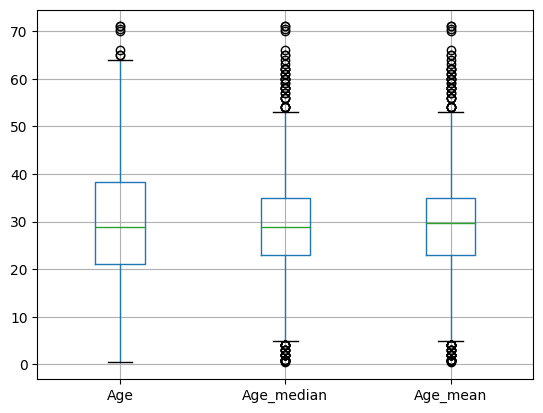

In [86]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

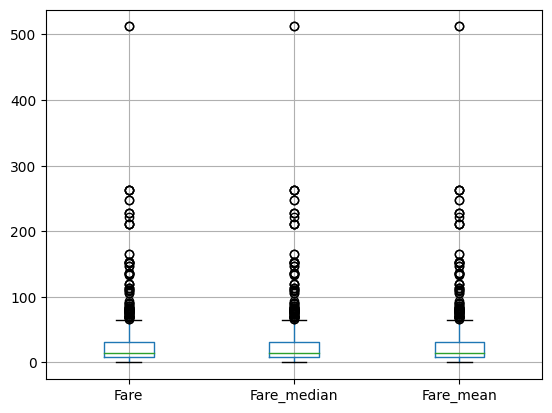

In [87]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Using Sklearn

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [89]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [90]:
trf = ColumnTransformer([
    ('impute_age',imputer1,['Age']),
    ('impute_fare',imputer2,['Fare'])
],remainder='passthrough')

In [91]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute_fare', SimpleImputer(), ['Fare'])])

In [92]:
trf.named_transformers_['impute_age'].statistics_

array([28.75])

In [93]:
trf.named_transformers_['impute_fare'].statistics_

array([32.28905604])

In [94]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [97]:
X_train_df = pd.DataFrame(X_train,columns=['Age','Fare','Family'])
X_train_df.head()


,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0


# **Arbitrary Value Imputation**

In [104]:
df=pd.read_csv(url,usecols=["Age","Fare","Survived","SibSp","Parch"])
family=df['Parch']+df['SibSp']
df['Family']=family
df.drop(['Parch','SibSp'],axis=1,inplace=True)
move = df.pop('Survived')
df.insert(3,'Survived', move)
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [106]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [110]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2368.2468324201327
Fare Variance after 999 wala imputation:  2368.2468324201327
Fare Variance after -1 wala imputation:  2368.2468324201327


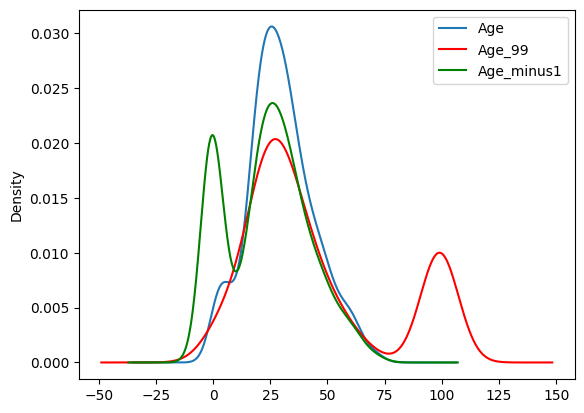

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

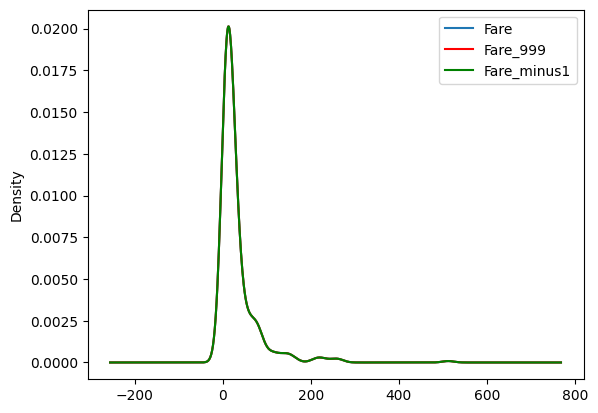

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [113]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,71.512440,-6.498901,204.349513,204.349513,71.512440,71.512440
Fare,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832
Family,-6.498901,16.847264,2.735252,-7.387287,-4.149246,16.847264,16.847264
Age_99,204.349513,-101.053412,-7.387287,951.727557,-189.535540,-101.053412,-101.053412
Age_minus1,204.349513,126.761454,-4.149246,-189.535540,318.089620,126.761454,126.761454
Fare_999,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832
Fare_minus1,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832


In [114]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.095814,-0.299113,1.000000,1.000000,0.095814,0.095814
Fare,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000
Family,-0.299113,0.209323,1.000000,-0.144787,-0.140668,0.209323,0.209323
Age_99,1.000000,-0.067310,-0.144787,1.000000,-0.344476,-0.067310,-0.067310
Age_minus1,1.000000,0.146049,-0.140668,-0.344476,1.000000,0.146049,0.146049
Fare_999,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000
Fare_minus1,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000


# Using Sklearn

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [116]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [117]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [119]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [120]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [121]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [122]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [125]:
X_train_df = pd.DataFrame(X_train,columns=['Age','Fare','Family'])
X_train_df.head()

,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0
